# Sentiment Analysis/Opinion Mining

## Objectives

- Understanding: 
    - Sentiment Analysis Tasks
        - Polarity Classification
        - Subjectivity Identification
        - Aspect/Feature-based Sentiment Analysis
    - Supervised Sentiment Analysis
    - Lexicon-based Sentiment Analysis
    - Aspect-based Sentiment Analysis
    
- Learning how to:
    - Perform supervised polarity classification
    - Use polarity/subjectivity lexicons for polarity and subjectivity detection
    - Use negation and valence shifter in sentiment analysis
    - Use dependency parsing for simple aspect extraction


### Recommended Reading
- Dan Jurafsky and James H. Martin. [__Speech and Language Processing__ (SLP)](https://web.stanford.edu/~jurafsky/slp3/) (3rd ed. draft)

### Covered Material
- SLP
    - [Chapter 20: Lexicons for Sentiment, Affect, and Connotation](https://web.stanford.edu/~jurafsky/slp3/25.pdf) 

### Requirements
- [NLTK](http://www.nltk.org/)    
- [spaCy](https://spacy.io/)

## 1. Sentiment Analysis Tasks

[Sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis) (also known as **opinion mining**) is the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study _affective states_ and _subjective information_.

- __Polarity Classification__: classify an opinion exressed by a given text as positive, negative, or neutral.
    - alternatively predict:
        - rating score (number of stars) 
        - emotion label (anger, fear, etc.)
    - different levels:
        - word in context
        - sentence
        - document

- __Subjectivity/Objectivity Identification__: classifying a given text (usually a sentence) into subjective (*opinion*) and objective (*factual*) classes.
    - sometimes harder than polarity classification

- __Feature/Aspect-based Sentiment Analysis__: sentiments expressed on different features or aspects of entities.
    - involves several sub-problems
        - identifying relevant entities
        - extracting their features/aspects
        - classifying polarity of expressed opinion for an aspect
    - common methods are syntactic patterns and topic modeling

## 2. Polarity Classification using Supervised Machine Learning

- Pang, Lee, and Vaithyanathan. "Thumbs up? Sentiment classification using machine learning techniques". EMNLP. 2002.
- Pang and Lee. "[A sentimental education: Sentiment analysis using subjectivity summarization based on minimum cuts.](https://arxiv.org/pdf/cs/0409058.pdf)" ACL. 2004.

__Bottom-Line__:
- Machine Learning-based Sentiment Classification outperforms term counting 
- Unigrams as features are good enough (the best performance)
- __negation marking__ is useful
- __subjectivity detection__ is effective for polarity classification (at least for Niave Bayes)


#### Negation Marking

- Append `_NEG` suffix (or similar) to words that appear in the scope between a negation and a punctuation mark.

- implemented in `nltk.sentiment.util.mark_negation`

- handles double negations: (double negation is considered affirmation)


### 2.1. Polarity Classification on Movie Reviews

- Pang and Lee (2004). 
- 1000 negative & 1000 positive reviews extracted from the Internet Movie Database (IMDb)
- tokenized & lowercased
- Stratified 10-fold cross-validation

In [1]:
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\adnan\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [2]:
from nltk.corpus import movie_reviews
mr = movie_reviews
rev_neg = mr.paras(categories='neg')
rev_pos = mr.paras(categories='pos')

In [3]:
# uncomment & run to see that a document is a list of lists 
print(rev_neg[0])

[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.'], ['one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.'], ['what', "'", 's', 'the', 'deal', '?'], ['watch', 'the', 'movie', 'and', '"', 'sorta', '"', 'find', 'out', '.'], ['.'], ['.'], ['critique', ':', 'a', 'mind', '-', 'fuck', 'movie', 'for', 'the', 'teen', 'generation', 'that', 'touches', 'on', 'a', 'very', 'cool', 'idea', ',', 'but', 'presents', 'it', 'in', 'a', 'very', 'bad', 'package', '.'], ['which', 'is', 'what', 'makes', 'this', 'review', 'an', 'even', 'harder', 'one', 'to', 'write', ',', 'since', 'i', 'generally', 'applaud', 'films', 'which', 'attempt', 'to', 'break', 'the', 'mold', ',', 'mess', 'with', 'your', 'head', 'and', 'such', '(', 'lost', 'highway', '&', 'memento', ')', ',', 'but', 'there', 'are', '

In [4]:
# Let's use simple Naive Bayes Classification
import numpy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report

vectorizer = CountVectorizer()
classifier = MultinomialNB()

In [5]:
def lol2str(doc):
    # flatten & join
    return " ".join([w for sent in doc for w in sent])

In [6]:
# Let's prepare labels & data for scikit-learn
corpus = [lol2str(d) for d in rev_neg] + [lol2str(d) for d in rev_pos]
# Just to keep the code clean as vectorizer should be applied on the Traning set only
vectors = vectorizer.fit_transform(corpus)
labels = numpy.array([0] * len(rev_neg) + [1] * len(rev_pos))

In [7]:
# 10-fold cross-validation
scores = cross_validate(classifier, vectors, labels, cv=StratifiedKFold(n_splits=10) , scoring=['f1_micro'])
average = sum(scores['test_f1_micro'])/len(scores['test_f1_micro'])
print(round(average, 3))

0.814


### Exercise
- Experiment with and without appling the [Negation Marking](https://www.nltk.org/_modules/nltk/sentiment/util.html#mark_negation) to Movie Reviews Dataset
    - expects list as input
- Train SVM model
- Compare results to Naive Bayes performance

In [8]:
from nltk.sentiment.util import mark_negation
print(mark_negation("This is not cool".split()))

['This', 'is', 'not', 'cool_NEG']


In [9]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score

new_neg = []
for rev in rev_neg:
    new_rev = []
    for sentence in rev:
        # Apply or not the negation
        new_rev.append(mark_negation(sentence))
    new_neg.append(new_rev)

new_pos = []
for rev in rev_pos:
    new_rev = []
    for sentence in rev:
        new_rev.append(mark_negation(sentence)) # Apply or not the negation
    new_pos.append(new_rev)

# Prepare corpus and labels (it's copied from above)
new_corpus = [lol2str(d) for d in new_neg] + [lol2str(d) for d in rev_pos]

vectors = vectorizer.fit_transform(new_corpus)
ref = numpy.array([0] * len(rev_neg) + [1] * len(rev_pos))

# Initilize the StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
scores_svm = []
scores_nb = []
for i, (train_index, test_index) in enumerate(skf.split(new_corpus, ref)):
    
    x_train, x_test = [new_corpus[indx] for indx in train_index], [new_corpus[indx] for indx in test_index]
    y_train, y_test = [ref[indx] for indx in train_index], [ref[indx] for indx in test_index]
    vectorizer = CountVectorizer()

    # Train the vectorizer on train split
    vectorizer.fit(x_train)
    train_features = vectorizer.transform(x_train)
    test_features = vectorizer.transform(x_test)
    
    # Instantiate LinearSVM don't forget C parameter
    svm_classifier = LinearSVC(C=1)
    # Instantiace Multinomia Naive Bayes
    nb_classifier = MultinomialNB()
    
    clf_svm = svm_classifier.fit(train_features, y_train)
    hyp_svm = clf_svm.predict(test_features)

    print(classification_report(y_test, hyp_svm))

    # Append Macro f1 scores
    scores_svm.append(f1_score(y_test, hyp_svm, average='macro'))

    clf_nb = nb_classifier.fit(train_features, y_train)
    hyp_nb = clf_nb.predict(test_features)
    print(classification_report(y_test, hyp_nb))
    scores_nb.append(f1_score(y_test, hyp_nb, average='macro')) # Append Macro f1 score
    
print('SVM:', round(sum(scores_svm)/len(scores_svm), 3))
print('NB:', round(sum(scores_nb)/len(scores_nb), 3))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       100
           1       0.96      0.99      0.98       100

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       100
           1       0.93      1.00      0.97       100

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.96       200
weighted avg       0.97      0.96      0.96       200

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       100
           1       0.97      0.99      0.98       100

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

              preci

## 3. Lexicon-Based Sentiment Analysis with NLTK

### 3.1. Sentiment Analysis with SentiWordNet

#### 3.1.1. SentiWordNet

- Esuli & Sebastiani (LREC 2006) ["SENTIWORDNET: A Publicly Available Lexical Resource for Opinion Mining"](https://github.com/aesuli/SentiWordNet/blob/master/papers/LREC06.pdf)

- synset classification into positive-negative and subjective-objective classes
    - 3 labels: Positive, or Negative, or Objective
    - A term can be both Positive and Negative
- relies on training a set of classifiers for each class
    - different training data and algorithm
- synset score reflects the classifier agreement
- scores for Positive, Negative, and Objective sum to 1.0

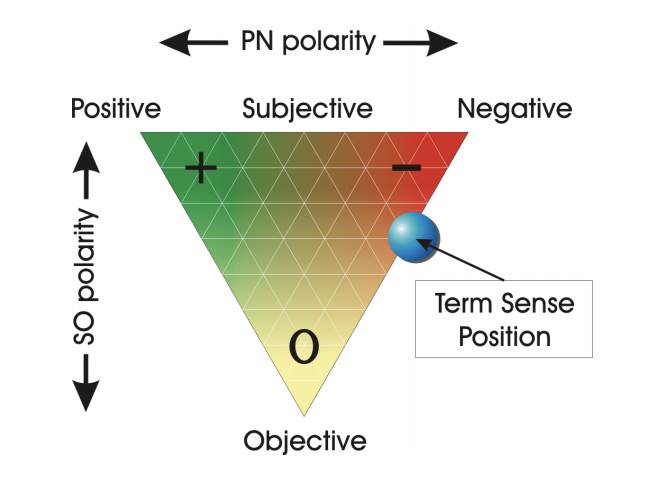

In [9]:
import nltk
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\adnan\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [10]:
from nltk.corpus import sentiwordnet as swn

#### Example
Let's get synsets and their scores for a word "*delicous*"

- From word 2 scores

In [11]:
senses = swn.senti_synsets('delicious')

In [12]:
for sense in senses:
    print(sense)  # get sense representation
    print(sense.pos_score())  # get positive score
    print(sense.neg_score())  # get negative score
    print(sense.obj_score())  # get objectivity score

<delicious.n.01: PosScore=0.0 NegScore=0.0>
0.0
0.0
1.0
<delightful.s.01: PosScore=0.75 NegScore=0.0>
0.75
0.0
0.25
<delectable.s.01: PosScore=0.75 NegScore=0.25>
0.75
0.25
0.0


- We can use pos-tags for filtering similar to WordNet

In [13]:
senses = swn.senti_synsets('delicious', pos='a')
print(list(senses))

[SentiSynset('delightful.s.01'), SentiSynset('delectable.s.01')]


- From synset to scores

In [14]:
synset = 'delightful.s.01'
sense = swn.senti_synset(synset)
print(sense)  # get sense representation
print(sense.pos_score())  # get positive score
print(sense.neg_score())  # get negative score
print(sense.obj_score())  # get objectivity score


<delightful.s.01: PosScore=0.75 NegScore=0.0>
0.75
0.0
0.25


#### 3.1.2. WSD Adaptation

##### Practical Issues
- Since scores are assigned to WordNet synsets, Word Sense Disambigaution is useful
- Baseline is the first (most common) sense

In [15]:
from nltk.corpus import wordnet

# lesk's filtering w.r.t. pos-tag makes distinction between 'a' & 's'; we do not
# thus, let's modify the function
def lesk(context_sentence, ambiguous_word, pos=None, synsets=None):
    """Return a synset for an ambiguous word in a context.

    :param iter context_sentence: The context sentence where the ambiguous word
         occurs, passed as an iterable of words.
    :param str ambiguous_word: The ambiguous word that requires WSD.
    :param str pos: A specified Part-of-Speech (POS).
    :param iter synsets: Possible synsets of the ambiguous word.
    :return: ``lesk_sense`` The Synset() object with the highest signature overlaps.
    """

    context = set(context_sentence)
    if synsets is None:
        synsets = wordnet.synsets(ambiguous_word)

    if pos:
        if pos == 'a':
            synsets = [ss for ss in synsets if str(ss.pos()) in ['a', 's']]
        else:
            synsets = [ss for ss in synsets if str(ss.pos()) == pos]

    if not synsets:
        return None

    _, sense = max(
        (len(context.intersection(ss.definition().split())), ss) for ss in synsets
    )

    return sense

#### 3.1.3. NLTK POS-Tagging (Reminder)

In [16]:
from nltk import pos_tag

In [17]:
# universal tags to WordNet tags for WordNet
pos2wn = {"NOUN": "n", "VERB": "v", "ADJ": "a", "ADV": "r"}

In [18]:
# Let's pot-tag first sentense of Movie Reviews using Universal Tag Set
# & convert it to WordNet Tags
tagged = pos_tag(rev_neg[0][0], tagset='universal')
# if it is not among these 4, we can set it to None, since it is not in WordNet
wntags = [(w, pos2wn.get(t, None)) for w,t in tagged]
print(wntags)

[('plot', 'n'), (':', None), ('two', None), ('teen', 'n'), ('couples', 'n'), ('go', 'v'), ('to', None), ('a', None), ('church', 'n'), ('party', 'n'), (',', None), ('drink', 'n'), ('and', None), ('then', 'r'), ('drive', 'n'), ('.', None)]


#### 3.1.4. Scoring a Document with SentiWordNet
- POS-tagging
- Word Sense Disambiguation
- Score per document/sentence/token

In [19]:
def score_sent(sent, use_pos=False):
    pos = []
    neg = []
    obj = []
    if use_pos:
        tagged_sent = pos_tag(sent, tagset='universal')
    else:
        tagged_sent = [(w, None) for w in sent]
        
    for tok, tag in tagged_sent:
        ss = lesk(sent, tok, pos=pos2wn.get(tag, None))
        if ss:
            sense = swn.senti_synset(ss.name())
            pos.append(sense.pos_score())
            neg.append(sense.neg_score())
            obj.append(sense.obj_score())
    return pos, neg, obj

In [20]:
def score(doc, use_pos=False):
    pos = []
    neg = []
    obj = []
    for sent in doc:
        sent_pos, sent_neg, sent_obj = score_sent(sent, use_pos=use_pos)
        pos.extend(sent_pos)
        neg.extend(sent_neg)
        obj.extend(sent_obj)
    
    scores = {
        "pos": sum(pos),
        "neg": sum(neg),
        "obj": sum(obj)
    }    
    return scores
    

In [21]:
print(score(rev_neg[0]))
print(score(rev_neg[0], use_pos=True))

{'pos': 30.375, 'neg': 28.125, 'obj': 479.5}
{'pos': 29.25, 'neg': 32.125, 'obj': 449.625}


### 3.2. From Scores to Labels

The simplest classification function would be taking the max of negative and positive scores to assign polarity.
Let's break ties as positives (could be random)

In [22]:
def classify(doc, pos=False):
    scores = score(doc, use_pos=pos)
    return "N" if scores.get("neg") > scores.get("pos") else "P"

#### 3.2.1. Classifying Movie Reviews

In [23]:
# Let's create labels
neg_ref = ['N'] * len(rev_neg)
pos_ref = ['P'] * len(rev_pos)
ref = neg_ref + pos_ref

In [24]:
# Classification without POS-tags
neg_hyp = [classify(doc) for doc in rev_neg]
pos_hyp = [classify(doc) for doc in rev_pos]
hyp = neg_hyp + pos_hyp

In [26]:
from sklearn.metrics import classification_report
print(classification_report(ref, hyp))

              precision    recall  f1-score   support

           N       0.68      0.43      0.53      1000
           P       0.58      0.80      0.67      1000

    accuracy                           0.61      2000
   macro avg       0.63      0.61      0.60      2000
weighted avg       0.63      0.61      0.60      2000



In [27]:
# Classification with POS-tags
neg_hyp_pos = [classify(doc, pos=True) for doc in rev_neg]
pos_hyp_pos = [classify(doc, pos=True) for doc in rev_pos]
hyp_pos = neg_hyp_pos + pos_hyp_pos
print(classification_report(ref, hyp_pos))

              precision    recall  f1-score   support

           N       0.67      0.43      0.53      1000
           P       0.58      0.79      0.67      1000

    accuracy                           0.61      2000
   macro avg       0.63      0.61      0.60      2000
weighted avg       0.63      0.61      0.60      2000



### 3.2.2. The Simplest Counting Approach
- count positive and negative terms;
- document is __positive__, if the count of positive terms is higher than the count of negative terms
- document is __negative__, if the count of negative terms is higher than the count of positive terms
- document is __neutral__, if it contains an equal number of positive or negative terms

#### 3.2.3. Term Counting with Valence Shifters and Intensifiers

(Kennedy and Inkpen, "Sentiment Classification of Movie and Product Reviews Using Contextual Valence Shifters", FINEXIN, 2005)

- count positive and negative terms taking into account __valence shifters__ and __intensifiers__
- __valence shifters__ are terms that change the polarity of a term (e.g. negations: *not*, *none*)
- __intentsifiers__ are terms that increase of decrease the weight of a positive or negative term (e.g. *very*)


- all positive sentiment terms are given a value of 2;
- if they are preceded by an overstatement (intensifier) in the same clause then they are given a value of 3;
- if they are preceded by an understatement (diminisher) in the same clause then they are given a value of 1;
- Negative sentiment terms are given a value of -2 by default and -1 and -3 if preceded by understatements and overstatements respectively.

#### 3.2.4. Implementation (Example)
https://github.com/esrel/SentiLex

##### Algorithm

- Assign each token to a category:
    - punctuation (to reset intensity and valence shift)
    - polarity word (value from `-2` to `+2`, but could be any range)
    - intensifier word (value is `2`)
    - shifter word (value is `-1`)
- Iterate of a list of tagged words computing their score as
    - `shift * intensity * polarity`
    - reset shift and intensity (i.e. set to `1` if a word is punctuation)
- Skip words not in lexicon or punctuation
- Final score is sum of token-level scores
    - negative if score < 0, 
    - positive if score > 1

In [29]:
# Algorithm implementation
def score(doc):
    shift = 1
    intensity = 1
    score = 0
    lexicon = doc.lexicon
    for tok, tag in doc:
        if tag == "punct":
            shift = 1
            intensity = 1
            continue
        if tok in lexicon:
            if lexicon[tok] == "intensifier":
                intensity = 2
            elif lexicon[tok] == "shifter":
                shift = -1
            else:
                score += shift * intensity * lexicon[tok]
                shift = 1
                intensity = 1
    return score

### 3.3. VADER Approach
[Valence Aware Dictionary for sEntiment Reasoning](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf)

- Lexicon and heuristic based sentiment analysis
    - Considers both polarity and intensity
    - Valence ranges from -4 to +4
    - Neutral is 0
- Good for short texts (e.g. twits)
    - not rich enough features for machine learning approaches
- As accurate as a human (?)

#### 3.3.1. Extended Lexicon

Polarity & Intentsity words +:
- __Emoticons__: :D, :P, etc.
- __Acronyms__: LOL, ROFL, etc.
- __Other Sentiment Carrying Exressions__: meh, 

#### 3.3.2. VADER Heuristics

1. __Intensifiers__ either increase or decrease intensity.
    - *This is very bad.* is more intense than *This is slightly bad.*
    
2. __Polarity Shifters__ include conjunctions, specifically `but`, which signals shift in polarity, and the sentiment after `but` is dominant.
    - *This is bad, but we can handle it well.*
    - Mixed polarity, but overall sentiment is mostly due to the 2nd clause.
    
3. __Negations__ are considered in the window of preceding 3 words to a polarity bearing word. (Captures 90% of polarity shifts due to negation.)
    - *This is not that bad.*

4. __Punctuation__ is an *intensifier* (e.g. `!`)
    - *This is bad!* is more intense than *This is bad.*
    
5. __Capitalization__, especiall ALL-CAPS, intensifies a sentiment-bearing word in the context of other non-capitalized words.
    - *This is BAD.* is more intense than *This is bad.*

#### 3.3.3. Scoring

- The compound score is a sum of valence scores of each lexicon entry. 
- Valence scores are computed w.r.t. the heuristics and __normalized__ between -1 (negative) and 1 (positive).

__Normalization__

$$x = \frac{x}{\sqrt{x^2 + \alpha}}$$

where:
- $x$ -- sum of valence scores of constituent words
- $\alpha$ -- normalization constant (default is 15)

#### 3.3.4. VADER in NLTK

In [25]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\adnan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

##### Accessing VADER Lexicon

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer, VaderConstants
vlex = VaderConstants()
print(vlex.BOOSTER_DICT)

{'absolutely': 0.293, 'amazingly': 0.293, 'awfully': 0.293, 'completely': 0.293, 'considerably': 0.293, 'decidedly': 0.293, 'deeply': 0.293, 'effing': 0.293, 'enormously': 0.293, 'entirely': 0.293, 'especially': 0.293, 'exceptionally': 0.293, 'extremely': 0.293, 'fabulously': 0.293, 'flipping': 0.293, 'flippin': 0.293, 'fricking': 0.293, 'frickin': 0.293, 'frigging': 0.293, 'friggin': 0.293, 'fully': 0.293, 'fucking': 0.293, 'greatly': 0.293, 'hella': 0.293, 'highly': 0.293, 'hugely': 0.293, 'incredibly': 0.293, 'intensely': 0.293, 'majorly': 0.293, 'more': 0.293, 'most': 0.293, 'particularly': 0.293, 'purely': 0.293, 'quite': 0.293, 'really': 0.293, 'remarkably': 0.293, 'so': 0.293, 'substantially': 0.293, 'thoroughly': 0.293, 'totally': 0.293, 'tremendously': 0.293, 'uber': 0.293, 'unbelievably': 0.293, 'unusually': 0.293, 'utterly': 0.293, 'very': 0.293, 'almost': -0.293, 'barely': -0.293, 'hardly': -0.293, 'just enough': -0.293, 'kind of': -0.293, 'kinda': -0.293, 'kindof': -0.293,

In [27]:
print(vlex.NEGATE)

{'arent', 'havent', 'isnt', 'shant', "couldn't", "daren't", "ain't", "weren't", "can't", 'nowhere', 'neednt', "oughtn't", 'wasnt', 'uhuh', 'never', "doesn't", 'hasnt', 'seldom', "hadn't", 'nope', 'didnt', 'wont', "aren't", 'not', 'dont', "wouldn't", 'wouldnt', "shouldn't", 'nothing', 'shouldnt', 'without', 'couldnt', 'hadnt', 'darent', "didn't", "won't", "don't", "wasn't", "needn't", 'despite', 'werent', 'uh-uh', "haven't", "mustn't", 'oughtnt', "hasn't", 'aint', 'doesnt', 'neither', 'none', "isn't", 'mustnt', 'nor', "mightn't", 'cannot', 'rarely', "shan't", 'cant', 'mightnt'}


##### Polarity Classification with VADER

In [28]:
analyzer = SentimentIntensityAnalyzer()

##### Illustration of the Heuristics

In [29]:
data = [
    'This is bad .',
    'This is bad !',
    'This is BAD .',
    'This is very bad .',
    'This is slightly bad .',
    'This is bad , but we can handle it well .',
    'This is not that bad .',
    # combined features
    'This is very BAD !!!',
    "This is very BAD !!! :'(",
]

In [30]:
for sent in data:
    print(analyzer.polarity_scores(sent))

{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}
{'neg': 0.655, 'neu': 0.345, 'pos': 0.0, 'compound': -0.5848}
{'neg': 0.679, 'neu': 0.321, 'pos': 0.0, 'compound': -0.6408}
{'neg': 0.558, 'neu': 0.442, 'pos': 0.0, 'compound': -0.5849}
{'neg': 0.517, 'neu': 0.483, 'pos': 0.0, 'compound': -0.4951}
{'neg': 0.189, 'neu': 0.588, 'pos': 0.223, 'compound': 0.1027}
{'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'compound': 0.431}
{'neg': 0.575, 'neu': 0.425, 'pos': 0.0, 'compound': -0.7508}
{'neg': 0.689, 'neu': 0.311, 'pos': 0.0, 'compound': -0.871}


### Exercises

Using the dataset **Movie Reviews**:

1. Implement classification using counts of negative and positive terms (i.e. convert scores to label at token-level and count those for a document) (*Using VADER*)
2. Implement classification using counts of negative and positive sentences (i.e. score sentences and aggregate their labels) (*Using VADER*)

3. Train and evaluate supervised machine learning model by first removing objective sentences.
4. Classify Movie Reviews using VADER.
5. Do a proper cross-validation evaluation

In [31]:
import numpy as np
print("WORD LEVEL")
print("="*89)

def polarity_word_level(document, analyzer):
    pos = 0
    neg = 0
    labels = ['P', 'N']

    for sentence in document:
        for w in sentence:
            # extract the polarities using Vader
            value = analyzer.polarity_scores(w)
            # Using the compound value check if the word is positive or not
            if value['compound'] > 0:
                pos += 1
            elif value['compound'] < 0:
                neg += 1
            else:
                continue

    return labels[np.argmax(np.asarray([pos, neg]))]
# Sanity Check
hyp_word_level = [polarity_word_level(doc, analyzer) for doc in rev_neg] + \
                 [polarity_word_level(doc, analyzer) for doc in rev_pos]
print(classification_report(ref, hyp_word_level))    
print("="*89)

WORD LEVEL
              precision    recall  f1-score   support

           N       0.73      0.32      0.44      1000
           P       0.56      0.88      0.69      1000

    accuracy                           0.60      2000
   macro avg       0.65      0.60      0.57      2000
weighted avg       0.65      0.60      0.57      2000



In [32]:
print("SENTENCE LEVEL")
print("="*89)
def polarity_sentence_level(document, analyzer):
    pos = 0
    neg = 0
    labels = ['P', 'N']

    for sentence in document:
        sentence = ' '.join(sentence)
        value = analyzer.polarity_scores(sentence)  # Extract the polarities using Vader
        # Using the compound value check if the sentence is positive or not
        if value['compound'] > 0:
            pos += 1
        elif value['compound'] < 0:
            neg += 1
        else:
            continue

        # Discard neutrals 
    return labels[np.argmax(np.asarray([pos, neg]))]

# Sanity check
hyp_sentence_level = [polarity_sentence_level(doc, analyzer) for doc in rev_neg] + \
                  [polarity_sentence_level(doc, analyzer) for doc in rev_pos]
print(classification_report(ref, hyp_sentence_level))

SENTENCE LEVEL
              precision    recall  f1-score   support

           N       0.72      0.39      0.50      1000
           P       0.58      0.85      0.69      1000

    accuracy                           0.62      2000
   macro avg       0.65      0.62      0.60      2000
weighted avg       0.65      0.62      0.60      2000



In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

# Remove objective sentences
def rm_objective_sentences(document, analyzer):
    new_doc = []
    for sentence in document:
        sentence = ' '.join(sentence)
        value = analyzer.polarity_scores(sentence)  # Extract the polarities using Vader
        # Add into new_doc the sentences with a polarity
        if value['compound'] == 0:
            new_doc.append(sentence)
        else:
            continue

    return new_doc

# Vader classifier i.e. polarity at document level
def polarity_doc_level(document, analyzer):
    print(document)
    value = analyzer.polarity_scores(document) # Extract the polarities using Vader
    # Decide if a document if pos (P) or neg (N)
    if value['compound'] > 0:
        return 'P'
    elif value['compound'] < 0:
        return 'N'
    else:
        # Deal with objectivity, you cannot discard objective documents, although there should not be
        # any in this dataset
        return 'N'
    
rev_neg_wo_objective = [" ".join(rm_objective_sentences(doc, analyzer)) for doc in rev_neg]
rev_pos_wo_objective = [" ".join(rm_objective_sentences(doc, analyzer)) for doc in rev_pos]
corpus_wo_objective = rev_neg_wo_objective + rev_pos_wo_objective

In [34]:
# Train and test with Stratified K Fold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
scores_clf = []
scores_vader = []
scores_sentence = []
scores_word = []

for i, (train_index, test_index) in enumerate(skf.split(corpus_wo_objective, ref)):
    x_train, x_test = [corpus_wo_objective[indx] for indx in train_index], [corpus_wo_objective[indx] for indx in test_index]
    y_train, y_test = [ref[indx] for indx in train_index], [ref[indx] for indx in test_index]
    # Needed for word and sentence level
    test_x_split = [[sentence.split() for sentence in doc.splitlines()] for doc in x_test]

    # Initialize the vectorizer and extract features
    vectorizer = TfidfVectorizer()
    train_features = vectorizer.fit_transform(x_train) # Extract the training features with the vectorizer
    test_features = vectorizer.transform(x_test) # Extract the test features with the vectorizer
    
    clf = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
    clf.fit(train_features, y_train)

    hyp = clf.predict(test_features)
    scores_clf.append(f1_score(y_test, hyp, average='macro'))
    
    hyp_vader = [polarity_doc_level(doc, analyzer) for doc in x_test]
    scores_vader.append(f1_score(y_test, hyp_vader, average='macro'))
    
    hyp_word = [polarity_word_level(doc, analyzer) for doc in test_x_split]
    scores_word.append(f1_score(y_test, hyp_word, average='macro'))
    
    hyp_sentence = [polarity_sentence_level(doc, analyzer) for doc in test_x_split]
    scores_sentence.append(f1_score(y_test, hyp_sentence, average='macro'))
    
    
print('F1 classifier:', round(sum(scores_clf)/len(scores_clf), 3))
print('F1 VADER:',  round(sum(scores_vader)/len(scores_vader), 3))
print('F1 Word:',  round(sum(scores_word)/len(scores_word), 3))
print('F1 Sentence:',  round(sum(scores_sentence)/len(scores_sentence), 3))

sanders ) running for reelection . in the matchmaker , it happens when garofalo walks into her hotel bathroom and finds a nude sean ( david o ' hara ) in the bathtub , his dog sitting at his side . i haven ' t mentioned the movie ' s twist yet . oh , and in keeping with the matchmaker ' s utter predictability , he dies toward the end . what the message here ? leary stays stateside , for the most part , yelling at garofalo over the phone and generally being an asshole .
g . . ) . douglas soon learns that montgomery is working for dr . moreau their maker . the island of dr . dr . . . . . . rather ungloriously at times too . more screen time could have been used for character interaction and development . at most , i would say the beast - men looked just a bit more realistic than those apes in planet of the apes . this h . g . as a third outing , the island of dr . the flying inkpot rating system : * wait for the tv2 broadcast . see it twice .
he doesn ' t know much about the circumstance

## 4. Aspect-Based Sentiment Analysis using Dependency Parsing

*Not just assigning polarity to a sentence in a review, but to an aspect of the entity being reviewed.*

### 4.1. Algorithm
- Aspect Term Extraction
- Aspect Polarity Detection (regular polarity classification)

#### Aspect Term Extraction (Simple)
- Extract all the NOUNS from a set of sentences (e.g. a collection of reviews)
- Group aspects with respect to semantic similarity (e.g. embedding cosine similarity)
- Alternatively done with a pre-defined set of aspects

### 4.2. Hotel Review
https://www.tripadvisor.com/Hotel_Review-g187861-d1234279-Reviews-Hotel_Villa_Madruzzo-Trento_Province_of_Trento_Trentino_Alto_Adige.html

```
The setting of this hotel is really lovely. 
Rooms are spacious, spotlessly clean, with large and comfortable beds. 
We appreciated the courtesy touches, such as the fresh fruit on the table, always replaced.

However, our room, in the new building, came at 200 euros a night (admittedly it was a busy weekend), and at this price one begins of course to be more demanding and less forgiving :-) , so let me mention that I would expect a better shower, and that the parking and manoeuvrability situation is not the best (narrow passage + slight chaos when full).

But I want to conclude on a positive note: their breakfast is very good, with a sense of abundance, fresh juices, many jams and teas and cereals and nuts, proper just prepared scrambled eggs, (note for Anglo-Saxon visitors: it's mostly "European" style, so apart from the eggs don't expect many other hot/cooked items). And service (as well as reception) is excellent, with some people having more natural human warmth than others, but always courteous and helpful.
```

In [35]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

#### 4.2.1. Extracting Aspect Terms
Let's limit ourself to sentences of the form: *While the room is excellent*

In [36]:
txt = """The setting of this hotel is really lovely. 
Rooms are spacious, spotlessly clean, with large and comfortable beds. 
We appreciated the courtesy touches, such as the fresh fruit on the table, always replaced.

However, our room, in the new building, came at 200 euros a night (admittedly it was a busy weekend), and at this price one begins of course to be more demanding and less forgiving :-) , so let me mention that I would expect a better shower, and that the parking and manoeuvrability situation is not the best (narrow passage + slight chaos when full).

But I want to conclude on a positive note: their breakfast is very good, with a sense of abundance, fresh juices, many jams and teas and cereals and nuts, proper just prepared scrambled eggs, (note for Anglo-Saxon visitors: it's mostly "European" style, so apart from the eggs don't expect many other hot/cooked items). And service (as well as reception) is excellent, with some people having more natural human warmth than others, but always courteous and helpful."""

In [37]:
doc = nlp(txt)

In [38]:
for sent in doc.sents:
    for tok in sent:
        if tok.dep_ == 'nsubj' and tok.pos_ == 'NOUN':
            print(tok.text)
            

setting
Rooms
room
one
situation
breakfast
eggs
service
people


#### 4.2.2. Aspect Extraction
- Let's use adjectives as polarity words
- Let's use adverbs as intensifiers
- Ignoring negation (though we shouldn't)

In [39]:
def extract(doc):
    aspects = []
    for sent in doc.sents:
        target = None
        opinion = None
        for tok in sent:
            if tok.dep_ == 'nsubj' and tok.pos_ == 'NOUN':
                target = tok.text
            if tok.pos_ == 'ADJ':
                descr = ''
                for child in tok.children:
                    if child.pos_ != 'ADV':
                        continue
                    descr += child.text + ' '
                opinion = descr + tok.text
        if target:
            aspects.append((target, opinion))
    return aspects
            

In [40]:
aspects = extract(doc)

####  4.2.3. Aspect Polarity Detection

In [41]:
for target, opinion in aspects:
    print(target, analyzer.polarity_scores(opinion))

setting {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.624}
Rooms {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5106}
situation {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
eggs {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
people {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4215}


## Lab Exercise: 

### First Part: Subjectivity & Polarity (2 points)
Create a pipeline model for Subjectivity and Polarity detection tasks. The pipeline has to be composed of two different models:

    1. The first model predicts if a sentence is subjective or objective;
    2. The second model performs the polarity detection of a document after removing the objective sentences predicted by the first model;

You have to report the results of the first and the second models. For the second model, you have to report the resutls achieved with and without the removal of the objective sentences to see if the pipeline can actually improve the performance. 

**The type of model**: You have to choose a Neutral Network in PyTorch (e.g. MLP or RNN) or a pre-trained language model (e.g. BERT or T5).

**Datasets**:

    - NLTK: subjectivity (Subjectivity task)
    - NLTK: movie reviews (Polarity task)
**Evaluation**:

Use a K-fold evaluation for both tasks where with K = 10

**References**:

- *A sentimental education: Sentiment analysis using subjectivity, Bo Pang and Lillian Lee, Proceedings of ACL, pp. 271--278, 2004*


### Second Part: Aspect Based Sentiment Analysis (4 points) for a mark $\ge$ 30
Implement a joint model based on a Neural Network or a Pre-trained Language model for the Aspect Based Sentiment Analysis task:

- Task 1: Extract the Aspect terms;
- Task 2: Detect the polarity of these terms;
    
**Dataset**: The dataset that you have to use is the Laptop partition of SemEval2014 task 4, you can downloaded it from [here](https://github.com/lixin4ever/E2E-TBSA/tree/master/data).

**Evaluation**:  For the evaluation you can refert to this [script](https://github.com/lixin4ever/E2E-TBSA/blob/master/evals.py) or the official script provided by [SemEval](https://alt.qcri.org/semeval2014/task4/index.php?id=data-and-tools) (Baseline, Evaluation and Evaluation link). Report F1, Precision and Recall for Task 1 alone, where you just consider the span ids, and jointly with Task2. You can jointly evaluate your model on these two tasks by considering both the span ids and polarity label in one single triple such as (id_start, id_end, polarity).

**References**:

- Hu, M., Peng, Y., Huang, Z., Li, D., & Lv, Y. (2019, July). Open-Domain Targeted Sentiment Analysis via Span-Based Extraction and Classification. In Proceedings of the 57th Annual Meeting of the Association for Computational Linguistics (pp. 537-546).






In [2]:
# Required Libraries
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertForSequenceClassification, BertTokenizer, AdamW
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

In [3]:
import nltk
import pandas as pd

nltk.download("subjectivity")
nltk.download("movie_reviews")

from nltk.corpus import subjectivity
from nltk.corpus import movie_reviews

[nltk_data] Downloading package subjectivity to
[nltk_data]     C:\Users\adnan\AppData\Roaming\nltk_data...
[nltk_data]   Package subjectivity is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\adnan\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [20]:
# Convert subjectivity dataset to a DataFrame
subjective_sents = [[sent, 'subjective'] for sent in subjectivity.sents(categories='subj')]
objective_sents = [[sent, 'objective'] for sent in subjectivity.sents(categories='obj')]

subjectivity_data = pd.DataFrame(subjective_sents + objective_sents, columns=['sentence', 'label'])

# Convert movie reviews to a DataFrame
reviews = [(list(movie_reviews.words(fileid)), category)
           for category in movie_reviews.categories()
           for fileid in movie_reviews.fileids(category)]

movie_reviews_data = pd.DataFrame(reviews, columns=['sentence', 'label'])

In [21]:
subjectivity_data.head()

,sentence,label
0,"[smart, and, alert, ,, thirteen, conversations...",subjective
1,"[color, ,, musical, bounce, and, warm, seas, l...",subjective
2,"[it, is, not, a, mass-market, entertainment, b...",subjective
3,"[a, light-hearted, french, film, about, the, s...",subjective
4,"[my, wife, is, an, actress, has, its, moments,...",subjective


In [22]:
movie_reviews_data.head()

,sentence,label
0,"[plot, :, two, teen, couples, go, to, a, churc...",neg
1,"[the, happy, bastard, ', s, quick, movie, revi...",neg
2,"[it, is, movies, like, these, that, make, a, j...",neg
3,"["", quest, for, camelot, "", is, warner, bros, ...",neg
4,"[synopsis, :, a, mentally, unstable, man, unde...",neg


In [23]:
# Convert sentences to string as they are in list format
subjectivity_data['sentence'] = subjectivity_data['sentence'].apply(' '.join)
movie_reviews_data['sentence'] = movie_reviews_data['sentence'].apply(' '.join)

In [8]:
# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [24]:
from nltk.corpus import subjectivity
from nltk.corpus import movie_reviews

# Convert subjectivity dataset to a DataFrame
subjective_sents = [[sent, 'subjective'] for sent in subjectivity.sents(categories='subj')]
objective_sents = [[sent, 'objective'] for sent in subjectivity.sents(categories='obj')]
subjectivity_data = pd.DataFrame(subjective_sents + objective_sents, columns=['sentence', 'label'])

# Convert movie reviews to a DataFrame
reviews = [(list(movie_reviews.words(fileid)), category)
           for category in movie_reviews.categories()
           for fileid in movie_reviews.fileids(category)]
movie_reviews_data = pd.DataFrame(reviews, columns=['sentence', 'label'])


In [4]:
import nltk
import pandas as pd
import torch
from torch.utils.data import DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW

nltk.download("subjectivity")
nltk.download("movie_reviews")

from nltk.corpus import subjectivity
from nltk.corpus import movie_reviews

# Convert subjectivity dataset to a DataFrame
subjective_sents = [[sent, 'subjective'] for sent in subjectivity.sents(categories='subj')]
objective_sents = [[sent, 'objective'] for sent in subjectivity.sents(categories='obj')]
subjectivity_data = pd.DataFrame(subjective_sents + objective_sents, columns=['sentence', 'label'])

# Convert movie reviews to a DataFrame
reviews = [(list(movie_reviews.words(fileid)), category)
           for category in movie_reviews.categories()
           for fileid in movie_reviews.fileids(category)]
movie_reviews_data = pd.DataFrame(reviews, columns=['sentence', 'label'])

# Define the pre-trained model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Define the training parameters
batch_size = 16
learning_rate = 2e-5
num_epochs = 3
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cuda:0'
# device = 'cpu'

[nltk_data] Downloading package subjectivity to
[nltk_data]     C:\Users\adnan\AppData\Roaming\nltk_data...
[nltk_data]   Package subjectivity is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\adnan\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initia

In [5]:
# Function to tokenize and prepare the data
def prepare_data(data):
    tokenized_texts = []
    labels = []
    for _, row in data.iterrows():
        sentence = row['sentence']
        label = row['label']
        inputs = tokenizer.encode_plus(sentence, add_special_tokens=True, padding='max_length',
                                       max_length=128, truncation=True, return_tensors='pt')
        tokenized_texts.append(inputs['input_ids'].squeeze())
        labels.append(1 if label == 'subjective' else 0)
    tokenized_texts = torch.stack(tokenized_texts)
    labels = torch.tensor(labels)
    dataset = torch.utils.data.TensorDataset(tokenized_texts, labels)
    return dataset

# Function to train the model
def train_model(model, train_loader):
    model.train()
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
    # optimizer = AdamW(model.parameters(), lr=learning_rate)
    total_steps = len(train_loader) * num_epochs
    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=learning_rate, total_steps=total_steps)

    for epoch in range(num_epochs):
        total_loss = 0
        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            scheduler.step()

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss:.4f}")

# Function to evaluate the model
def evaluate_model(model, eval_loader):
    model.eval()
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in eval_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted_labels = torch.max(outputs.logits, dim=1)
            total_correct += (predicted_labels == labels).sum().item()
            total_samples += labels.size(0)

    accuracy = total_correct / total_samples
    print(f"Accuracy: {accuracy:.4f}")

In [ ]:
# Split the subjectivity data into K folds
k = 10
subjectivity_splits = subjectivity_data.groupby('label').apply(
    lambda x: x.sample(frac=1).reset_index(drop=True)).reset_index(drop=True)
subjectivity_splits['fold'] = subjectivity_splits.groupby('label').cumcount() % k

# Perform K-fold cross-validation for subjectivity detection
for fold in range(k):
    print(f"Subjectivity Detection - Fold {fold+1}/{k}")
    train_data = subjectivity_splits[subjectivity_splits['fold'] != fold]
    train_dataset = prepare_data(train_data)

    val_data = subjectivity_splits[subjectivity_splits['fold'] == fold]
    val_dataset = prepare_data(val_data)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    model.to(device)

    train_model(model, train_loader)

    evaluate_model(model, val_loader)

Subjectivity Detection - Fold 1/10
Epoch 1/3, Loss: 176.9047
Epoch 2/3, Loss: 58.6527


In [ ]:
# Perform K-fold cross-validation for polarity detection
for fold in range(k):
    print(f"Polarity Detection - Fold {fold+1}/{k}")
    objective_sentences = subjectivity_splits[
        (subjectivity_splits['fold'] != fold) & (subjectivity_splits['label'] == 'objective')]['sentence']

    objective_data = movie_reviews_data[movie_reviews_data['sentence'].isin(objective_sentences)]
    subjective_data = movie_reviews_data[~movie_reviews_data['sentence'].isin(objective_sentences)]

    train_data = pd.concat([objective_data, subjective_data], ignore_index=True)
    train_dataset = prepare_data(train_data)

    val_data = movie_reviews_data[movie_reviews_data['sentence'].isin(objective_sentences)]
    val_dataset = prepare_data(val_data)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    model.to(device)

    train_model(model, train_loader)

    evaluate_model(model, val_loader)


In [1]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
import re
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import StratifiedKFold
from transformers import BertTokenizer, BertForSequenceClassification, AdamW

[nltk_data] Downloading package subjectivity to
[nltk_data]     C:\Users\adnan\AppData\Roaming\nltk_data...
[nltk_data]   Package subjectivity is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\adnan\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [ ]:
nltk.download("subjectivity")
nltk.download("movie_reviews")

from nltk.corpus import subjectivity
from nltk.corpus import movie_reviews

In [2]:
# Convert subjectivity dataset to a DataFrame
subjective_sents = [[sent, 'subjective'] for sent in subjectivity.sents(categories='subj')]
objective_sents = [[sent, 'objective'] for sent in subjectivity.sents(categories='obj')]
subjectivity_data = pd.DataFrame(subjective_sents + objective_sents, columns=['sentence', 'label'])

# Convert movie reviews to a DataFrame
reviews = [(list(movie_reviews.words(fileid)), category)
           for category in movie_reviews.categories()
           for fileid in movie_reviews.fileids(category)]
movie_reviews_data = pd.DataFrame(reviews, columns=['sentence', 'label'])

In [3]:
subjectivity_data.head()

,sentence,label
0,"[smart, and, alert, ,, thirteen, conversations...",subjective
1,"[color, ,, musical, bounce, and, warm, seas, l...",subjective
2,"[it, is, not, a, mass-market, entertainment, b...",subjective
3,"[a, light-hearted, french, film, about, the, s...",subjective
4,"[my, wife, is, an, actress, has, its, moments,...",subjective


In [4]:
movie_reviews_data.head()

,sentence,label
0,"[plot, :, two, teen, couples, go, to, a, churc...",neg
1,"[the, happy, bastard, ', s, quick, movie, revi...",neg
2,"[it, is, movies, like, these, that, make, a, j...",neg
3,"["", quest, for, camelot, "", is, warner, bros, ...",neg
4,"[synopsis, :, a, mentally, unstable, man, unde...",neg


In [5]:
# preprocess the data
def remove_punctuations(sentence):
    # remove punctuations from sentence
    return re.sub(r'[^\w\s]', '', sentence)

def preprocess(sentence):
    # apply functions on list of words in sentence
    sentence = [remove_punctuations(word) for word in sentence]
    sentence = [word.lower() for word in sentence]
    sentence = [word for word in sentence if word not in stopwords.words('english')]
    sentence = [word for word in sentence if word != '']
    # remove double spaces from words in sentence
    sentence = [' '.join(word.split()) for word in sentence]
    # remove numbers/special characters from words in sentence
    sentence = [re.sub(r'[^a-zA-Z]', '', word) for word in sentence]
    return sentence

In [6]:
# Preprocess the subjectivity dataset
subjectivity_data['sentence'] = subjectivity_data['sentence'].apply(preprocess)

In [7]:
# descriptive statistics of the subjectivity dataset
subjectivity_data.describe()

,sentence,label
count,10000,10000
unique,9998,2
top,"[friends, may, listen, learn, maybe, never, jo...",subjective
freq,2,5000


In [10]:
# max, min, and average length of sentences in the subjectivity dataset
print(f"Max length of sentences in the subjectivity dataset: {subjectivity_data['sentence'].str.len().max()}")
print(f"Min length of sentences in the subjectivity dataset: {subjectivity_data['sentence'].str.len().min()}")
print(f"Average length of sentences in the subjectivity dataset: {subjectivity_data['sentence'].str.len().mean()}")

Max length of sentences in the subjectivity dataset: 63
Min length of sentences in the subjectivity dataset: 2
Average length of sentences in the subjectivity dataset: 12.0443


In [8]:
# Preprocess the movie reviews dataset
movie_reviews_data['sentence'] = movie_reviews_data['sentence'].apply(preprocess)

In [9]:
# descriptive statistics of the movie reviews dataset
movie_reviews_data.describe()

,sentence,label
count,2000,2000
unique,1998,2
top,"[seemed, like, perfect, concept, better, farre...",neg
freq,2,1000


In [11]:
# max, min, and average length of sentences in the movie reviews dataset
print(f"Max length of sentences in the movie reviews dataset: {movie_reviews_data['sentence'].str.len().max()}")
print(f"Min length of sentences in the movie reviews dataset: {movie_reviews_data['sentence'].str.len().min()}")
print(f"Average length of sentences in the movie reviews dataset: {movie_reviews_data['sentence'].str.len().mean()}")

Max length of sentences in the movie reviews dataset: 1394
Min length of sentences in the movie reviews dataset: 6
Average length of sentences in the movie reviews dataset: 354.286


In [22]:
# Vocabulary size of the subjectivity dataset
subjectivity_vocab = set()
for sentence in subjectivity_data['sentence']:
    for word in sentence:
        subjectivity_vocab.add(word)

print(f"Vocabulary size of the subjectivity dataset: {len(subjectivity_vocab)}")

Vocabulary size of the subjectivity dataset: 22504


In [23]:
# Vocabulary size of the movie reviews dataset
movie_reviews_vocab = set()
for sentence in movie_reviews_data['sentence']:
    for word in sentence:
        movie_reviews_vocab.add(word)

print(f"Vocabulary size of the movie reviews dataset: {len(movie_reviews_vocab)}")

Vocabulary size of the movie reviews dataset: 38855


In [43]:
# Define Subjectivity Model
class SubjectivityModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SubjectivityModel, self).__init__()
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        print(x.shape)
        embedded = self.embedding(x)
        outputs, _ = self.lstm(embedded)
        output = outputs[:, -1, :]
        output = self.fc(output)
        return output


# Define Polarity Model
class PolarityModel(nn.Module):
    def __init__(self, num_classes):
        super(PolarityModel, self).__init__()
        self.bert = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)

    def forward(self, inputs):
        outputs = self.bert(**inputs)
        return outputs.logits

# Custom Dataset
class TextClassificationDataset(Dataset):
    def __init__(self, data, tokenizer):
        self.data = data
        self.tokenizer = tokenizer

    def __getitem__(self, index):
        sentence = self.data.iloc[index]['sentence']
        label = self.data.iloc[index]['label']
        inputs = self.tokenizer.encode_plus(sentence, add_special_tokens=True, padding='max_length',
                                            max_length=128, truncation=True, return_tensors='pt')
        item = {
            'inputs': inputs,
            'label': 1 if label == 'subjective' else 0
        }
        return item

    def __len__(self):
        return len(self.data)

# Training function for Subjectivity Model
def train_subjectivity_model(model, train_loader, criterion, optimizer, device):
    model.train()
    for batch in train_loader:
        inputs = batch['inputs'].to(device)
        labels = batch['label'].to(device)
        optimizer.zero_grad()
        outputs = model(inputs['input_ids'])
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Training function for Polarity Model
def train_polarity_model(model, train_loader, criterion, optimizer, device):
    model.train()
    for batch in train_loader:
        inputs = {key: value.squeeze().to(device) for key, value in batch['inputs'].items()}
        labels = batch['label'].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Evaluation function for Subjectivity Model
def evaluate_subjectivity_model(model, eval_loader, device):
    model.eval()
    total_correct = 0
    total_samples = 0
    with torch.no_grad():
        for batch in eval_loader:
            inputs = batch['inputs'].to(device)
            labels = batch['label'].to(device)
            outputs = model(inputs)
            _, predicted_labels = torch.max(outputs, dim=1)
            total_correct += (predicted_labels == labels).sum().item()
            total_samples += labels.size(0)
    accuracy = total_correct / total_samples
    return accuracy

# Evaluation function for Polarity Model
def evaluate_polarity_model(model, eval_loader, device):
    model.eval()
    total_correct = 0
    total_samples = 0
    with torch.no_grad():
        for batch in eval_loader:
            inputs = {key: value.squeeze().to(device) for key, value in batch['inputs'].items()}
            labels = batch['label'].to(device)
            outputs = model(inputs)
            _, predicted_labels = torch.max(outputs, dim=1)
            total_correct += (predicted_labels == labels).sum().item()
            total_samples += labels.size(0)
    accuracy = total_correct / total_samples
    return accuracy


In [34]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
os.environ["TORCH_USE_CUDA_DSA"] = "1"


In [44]:
# Training parameters
subjectivity_input_size = 10000
subjectivity_hidden_size = 128
subjectivity_num_classes = 2
subjectivity_batch_size = 16
subjectivity_learning_rate = 0.001
subjectivity_num_epochs = 3

polarity_num_classes = 2
polarity_batch_size = 16
polarity_learning_rate = 2e-5
polarity_num_epochs = 3

# For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
# Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
# device = 'cuda:0'
device = 'cpu'

# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Subjectivity Model
subjectivity_model = SubjectivityModel(subjectivity_input_size, subjectivity_hidden_size, subjectivity_num_classes)
subjectivity_model.to(device)
subjectivity_criterion = nn.CrossEntropyLoss()
subjectivity_optimizer = optim.Adam(subjectivity_model.parameters(), lr=subjectivity_learning_rate)

# Polarity Model
polarity_model = PolarityModel(polarity_num_classes)
polarity_model.to(device)
polarity_criterion = nn.CrossEntropyLoss()
polarity_optimizer = optim.AdamW(polarity_model.parameters(), lr=polarity_learning_rate)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [45]:
# K-fold Cross-validation for Subjectivity Detection
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
subjectivity_data['fold'] = -1

for fold, (_, valid_index) in enumerate(skf.split(subjectivity_data['sentence'], subjectivity_data['label'])):
    subjectivity_data.loc[valid_index, 'fold'] = fold

subjectivity_data['fold'] = subjectivity_data['fold'].astype(int)

subjectivity_fold_accuracies = []

for fold in range(k):
    print(f"Subjectivity Detection - Fold {fold+1}/{k}")
    train_data = subjectivity_data[subjectivity_data['fold'] != fold]
    val_data = subjectivity_data[subjectivity_data['fold'] == fold]
    train_dataset = TextClassificationDataset(train_data, tokenizer)
    val_dataset = TextClassificationDataset(val_data, tokenizer)
    train_loader = DataLoader(train_dataset, batch_size=subjectivity_batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=subjectivity_batch_size)
    for epoch in range(subjectivity_num_epochs):
        train_subjectivity_model(subjectivity_model, train_loader, subjectivity_criterion, subjectivity_optimizer, device)
        accuracy = evaluate_subjectivity_model(subjectivity_model, val_loader, device)
        print(f"Epoch {epoch+1}/{subjectivity_num_epochs}, Validation Accuracy: {accuracy:.4f}")
    subjectivity_fold_accuracies.append(accuracy)

subjectivity_avg_accuracy = sum(subjectivity_fold_accuracies) / k
print(f"\nSubjectivity Detection Average Accuracy: {subjectivity_avg_accuracy:.4f}")

Subjectivity Detection - Fold 1/10
torch.Size([16, 1, 128])


IndexError: index out of range in self

In [ ]:
# K-fold Cross-validation for Polarity Detection
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
subjectivity_data['fold'] = -1

for fold, (_, valid_index) in enumerate(skf.split(subjectivity_data['sentence'], subjectivity_data['label'])):
    subjectivity_data.loc[valid_index, 'fold'] = fold

subjectivity_data['fold'] = subjectivity_data['fold'].astype(int)

polarity_fold_accuracies_with_removal = []
polarity_fold_accuracies_without_removal = []

for fold in range(k):
    print(f"Polarity Detection - Fold {fold+1}/{k}")
    objective_sentences = subjectivity_data[(subjectivity_data['fold'] != fold) & (subjectivity_data['label'] == 'objective')]['sentence']
    objective_data = movie_reviews_data[movie_reviews_data['sentence'].isin(objective_sentences)]
    subjective_data = movie_reviews_data[~movie_reviews_data['sentence'].isin(objective_sentences)]
    train_data = pd.concat([objective_data, subjective_data], ignore_index=True)
    val_data = movie_reviews_data[movie_reviews_data['sentence'].isin(objective_sentences)]
    train_dataset = TextClassificationDataset(train_data, tokenizer)
    val_dataset = TextClassificationDataset(val_data, tokenizer)
    train_loader = DataLoader(train_dataset, batch_size=polarity_batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=polarity_batch_size)

    # Polarity Detection with Removal
    for epoch in range(polarity_num_epochs):
        train_polarity_model(polarity_model, train_loader, polarity_criterion, polarity_optimizer, device)
        accuracy = evaluate_polarity_model(polarity_model, val_loader, device)
        print(f"Epoch {epoch+1}/{polarity_num_epochs}, Validation Accuracy (with removal): {accuracy:.4f}")
    polarity_fold_accuracies_with_removal.append(accuracy)

    # Polarity Detection without Removal
    train_data = pd.concat([objective_data, subjective_data], ignore_index=True)
    val_data = movie_reviews_data[movie_reviews_data['sentence'].isin(objective_sentences)]
    train_dataset = TextClassificationDataset(train_data, tokenizer)
    val_dataset = TextClassificationDataset(val_data, tokenizer)
    train_loader = DataLoader(train_dataset, batch_size=polarity_batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=polarity_batch_size)
    for epoch in range(polarity_num_epochs):
        train_polarity_model(polarity_model, train_loader, polarity_criterion, polarity_optimizer, device)
        accuracy = evaluate_polarity_model(polarity_model, val_loader, device)
        print(f"Epoch {epoch+1}/{polarity_num_epochs}, Validation Accuracy (without removal): {accuracy:.4f}")
    polarity_fold_accuracies_without_removal.append(accuracy)

polarity_avg_accuracy_with_removal = sum(polarity_fold_accuracies_with_removal) / k
polarity_avg_accuracy_without_removal = sum(polarity_fold_accuracies_without_removal) / k

print(f"\nPolarity Detection Average Accuracy (with removal): {polarity_avg_accuracy_with_removal:.4f}")
print(f"Polarity Detection Average Accuracy (without removal): {polarity_avg_accuracy_without_removal:.4f}")

In [96]:
# Importing libraries
import copy
import json
import os
from collections import Counter
from pprint import pprint

import numpy as np
import torch
import torch.nn as nn
from seqeval.metrics import f1_score
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from torch.utils.data import TensorDataset
from tqdm import tqdm, trange
from transformers import AdamW
from transformers import BertPreTrainedModel, BertModel, BertConfig
from transformers import BertTokenizer
from transformers import get_linear_schedule_with_warmup

# Global variables
device = 'cuda:0'  # cuda:0 means we are using the GPU with id 0, if you have multiple GPU
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"  # Used to report errors on CUDA side

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


class InputSample:
    def __init__(self, id_, words_, subjectivity_):
        self.id = id_
        self.words = words_
        self.subjectivity = subjectivity_

    def __repr__(self):
        return str(self.to_json_string())

    def to_dict(self):
        """Serializes this instance to a Python dictionary."""
        output = copy.deepcopy(self.__dict__)
        return output

    def to_json_string(self):
        """Serializes this instance to a JSON string."""
        return json.dumps(self.to_dict(), indent=2, sort_keys=True) + "\n"


class InputFeatures:
    def __init__(self, input_id, attention_mask, token_type_id, subjectivity_label_id):
        self.input_id = input_id
        self.attention_mask = attention_mask
        self.token_type_id = token_type_id
        self.subjectivity_label_id = subjectivity_label_id

    def __repr__(self):
        return str(self.to_json_string())

    def to_dict(self):
        """Serializes this instance to a Python dictionary."""
        output = copy.deepcopy(self.__dict__)
        return output

    def to_json_string(self):
        """Serializes this instance to a JSON string."""
        return json.dumps(self.to_dict(), indent=2, sort_keys=True) + "\n"


class DataProcessor:
    def __init__(self, train_raw_, test_raw_, subjectivity_labels_):
        self.train_raw = train_raw_
        self.test_raw = test_raw_

        self.subjectivity_labels = subjectivity_labels_

    def create_birt_format(self, mode):
        data_ = []

        if mode == "train":
            raw = self.train_raw
        elif mode == "test":
            raw = self.test_raw
        else:
            raise ValueError("The mode should be in train, dev or test")

        # convert dataframe to json format
        raw = raw.to_dict(orient='records')

        for i_, input_dict in enumerate(raw):
            input_id = "%s-%d" % (mode, i_)
            words_ = input_dict['sentence']
            subjectivity_ = input_dict['label']

            subjectivity_label_ = self.subjectivity_labels.index(subjectivity_) if subjectivity_ in self.subjectivity_labels else self.subjectivity_labels.index('UNK')

            data_.append(InputSample(id_=input_id, words_=words_, subjectivity_=subjectivity_label_))

        return data_


class SubjectivityDetectionModel(nn.Module):
    def __init__(self, num_subjectivity_labels):
        super(SubjectivityDetectionModel, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(768, num_subjectivity_labels)

    def forward(self, input_ids, attention_mask, token_type_ids):
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids
        )
        pooled_output = outputs[1]
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        return logits


def input2features(inputs, tokenizer, max_seq_length):
    cls_token = tokenizer.cls_token
    sep_token = tokenizer.sep_token
    unk_token = tokenizer.unk_token
    pad_token_id = tokenizer.pad_token_id

    features = []

    for i, sample in enumerate(inputs):
        tokens = []
        label_id = []

        for words_ in sample.words:
            words_tokens = tokenizer.tokenize(words_)
            tokens.extend(words_tokens)

            # add label for current sentence
            label_id.extend([int(sample.subjectivity)])  # Convert label to integer

        # add [CLS] and [SEP] tokens
        tokens = [cls_token] + tokens + [sep_token]
        label_id = [pad_token_id] + label_id + [pad_token_id]

        # convert tokens to ids
        input_id = tokenizer.convert_tokens_to_ids(tokens)

        # create attention mask
        attention_mask = [1] * len(input_id)

        # create token type ids
        token_type_id = [0] * len(input_id)

        # pad and truncate
        if len(input_id) > max_seq_length:
            input_id = input_id[:max_seq_length]
            attention_mask = attention_mask[:max_seq_length]
            token_type_id = token_type_id[:max_seq_length]
            label_id = label_id[:max_seq_length]
        else:
            padding_length = max_seq_length - len(input_id)
            input_id += [pad_token_id] * padding_length
            attention_mask += [0] * padding_length
            token_type_id += [0] * padding_length
            label_id += [pad_token_id] * padding_length

        features.append(
            InputFeatures(
                input_id=input_id,
                attention_mask=attention_mask,
                token_type_id=token_type_id,
                subjectivity_label_id=label_id
            )
        )

    return features



def convert_to_tensors(features, device, pad_token_id=0):
    all_input_ids = torch.tensor([f.input_id for f in features], dtype=torch.long)
    all_attention_mask = torch.tensor([f.attention_mask for f in features], dtype=torch.long)
    all_token_type_ids = torch.tensor([f.token_type_id for f in features], dtype=torch.long)

    max_seq_length = all_input_ids.size(1)

    # Pad or truncate the subjectivity_label_id
    all_subjectivity_label_ids = torch.tensor(
        [f.subjectivity_label_id[:max_seq_length] + [pad_token_id] * (max_seq_length - len(f.subjectivity_label_id))
         for f in features],
        dtype=torch.long
    )

    dataset = TensorDataset(all_input_ids, all_attention_mask, all_token_type_ids, all_subjectivity_label_ids)

    return dataset



def train(model, train_data, device):
    model.train()
    loss_fn = nn.CrossEntropyLoss()
    optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)

    for step, input_features in enumerate(train_data):
        input_ids, attention_mask, token_type_ids, subjectivity_label_id = convert_to_tensors(input_features, device)

        optimizer.zero_grad()
        logits = model(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        loss = loss_fn(logits, subjectivity_label_id)
        loss.backward()
        optimizer.step()


def evaluate_test(model, test_data, device):
    model.eval()
    loss_fn = nn.CrossEntropyLoss()
    total_loss = 0.0
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for input_features in test_data:
            input_ids, attention_mask, token_type_ids, subjectivity_label_id = convert_to_tensors(input_features, device)

            logits = model(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
            loss = loss_fn(logits, subjectivity_label_id)

            total_loss += loss.item()

            predicted_labels = torch.argmax(logits, dim=1)
            total_correct += (predicted_labels == subjectivity_label_id).sum().item()
            total_samples += len(predicted_labels)

    avg_loss = total_loss / total_samples
    accuracy = total_correct / total_samples

    return avg_loss, accuracy

In [90]:
import nltk
import pandas as pd
import re

In [7]:
nltk.download("subjectivity")
nltk.download("movie_reviews")

from nltk.corpus import subjectivity
from nltk.corpus import movie_reviews

[nltk_data] Downloading package subjectivity to
[nltk_data]     C:\Users\adnan\AppData\Roaming\nltk_data...
[nltk_data]   Package subjectivity is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\adnan\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [8]:
# Convert subjectivity dataset to a DataFrame
subjective_sents = [[sent, 'subjective'] for sent in subjectivity.sents(categories='subj')]
objective_sents = [[sent, 'objective'] for sent in subjectivity.sents(categories='obj')]
subjectivity_data = pd.DataFrame(subjective_sents + objective_sents, columns=['sentence', 'label'])

# Convert movie reviews to a DataFrame
reviews = [(list(movie_reviews.words(fileid)), category)
           for category in movie_reviews.categories()
           for fileid in movie_reviews.fileids(category)]
movie_reviews_data = pd.DataFrame(reviews, columns=['sentence', 'label'])

In [9]:
subjectivity_data.head()

,sentence,label
0,"[smart, and, alert, ,, thirteen, conversations...",subjective
1,"[color, ,, musical, bounce, and, warm, seas, l...",subjective
2,"[it, is, not, a, mass-market, entertainment, b...",subjective
3,"[a, light-hearted, french, film, about, the, s...",subjective
4,"[my, wife, is, an, actress, has, its, moments,...",subjective


In [10]:
movie_reviews_data.head()

,sentence,label
0,"[plot, :, two, teen, couples, go, to, a, churc...",neg
1,"[the, happy, bastard, ', s, quick, movie, revi...",neg
2,"[it, is, movies, like, these, that, make, a, j...",neg
3,"["", quest, for, camelot, "", is, warner, bros, ...",neg
4,"[synopsis, :, a, mentally, unstable, man, unde...",neg


In [16]:
# stopwords
from nltk.corpus import stopwords

# preprocess the data
def remove_punctuations(sentence):
    # remove punctuations from sentence
    return re.sub(r'[^\w\s]', '', sentence)

def preprocess(sentence):
    # apply functions on list of words in sentence
    sentence = [remove_punctuations(word) for word in sentence]
    sentence = [word.lower() for word in sentence]
    sentence = [word for word in sentence if word not in stopwords.words('english')]
    sentence = [word for word in sentence if word != '']
    # remove double spaces from words in sentence
    sentence = [' '.join(word.split()) for word in sentence]
    # remove numbers/special characters from words in sentence
    sentence = [re.sub(r'[^a-zA-Z]', '', word) for word in sentence]
    return sentence

In [17]:
# Preprocess the subjectivity dataset
subjectivity_data['sentence'] = subjectivity_data['sentence'].apply(preprocess)

In [18]:
# descriptive statistics of the subjectivity dataset
subjectivity_data.describe()

,sentence,label
count,10000,10000
unique,9998,2
top,"[friends, may, listen, learn, maybe, never, jo...",subjective
freq,2,5000


In [19]:
# max, min, and average length of sentences in the subjectivity dataset
print(f"Max length of sentences in the subjectivity dataset: {subjectivity_data['sentence'].str.len().max()}")
print(f"Min length of sentences in the subjectivity dataset: {subjectivity_data['sentence'].str.len().min()}")
print(f"Average length of sentences in the subjectivity dataset: {subjectivity_data['sentence'].str.len().mean()}")

Max length of sentences in the subjectivity dataset: 63
Min length of sentences in the subjectivity dataset: 2
Average length of sentences in the subjectivity dataset: 12.0443


In [20]:
# Preprocess the movie reviews dataset
movie_reviews_data['sentence'] = movie_reviews_data['sentence'].apply(preprocess)

In [21]:
# descriptive statistics of the movie reviews dataset
movie_reviews_data.describe()

,sentence,label
count,2000,2000
unique,1998,2
top,"[seemed, like, perfect, concept, better, farre...",neg
freq,2,1000


In [22]:
# max, min, and average length of sentences in the movie reviews dataset
print(f"Max length of sentences in the movie reviews dataset: {movie_reviews_data['sentence'].str.len().max()}")
print(f"Min length of sentences in the movie reviews dataset: {movie_reviews_data['sentence'].str.len().min()}")
print(f"Average length of sentences in the movie reviews dataset: {movie_reviews_data['sentence'].str.len().mean()}")

Max length of sentences in the movie reviews dataset: 1394
Min length of sentences in the movie reviews dataset: 6
Average length of sentences in the movie reviews dataset: 354.286


In [23]:
# Vocabulary size of the subjectivity dataset
subjectivity_vocab = set()
for sentence in subjectivity_data['sentence']:
    for word in sentence:
        subjectivity_vocab.add(word)

print(f"Vocabulary size of the subjectivity dataset: {len(subjectivity_vocab)}")

Vocabulary size of the subjectivity dataset: 22504


In [24]:
# Vocabulary size of the movie reviews dataset
movie_reviews_vocab = set()
for sentence in movie_reviews_data['sentence']:
    for word in sentence:
        movie_reviews_vocab.add(word)

print(f"Vocabulary size of the movie reviews dataset: {len(movie_reviews_vocab)}")

Vocabulary size of the movie reviews dataset: 38855


In [34]:
# Split the subjectivity dataset into train and test sets
subjectivity_train_data, subjectivity_test_data = train_test_split(subjectivity_data, test_size=0.2, random_state=42)

# Split the movie reviews dataset into train and test sets
movie_reviews_train_data, movie_reviews_test_data = train_test_split(movie_reviews_data, test_size=0.2, random_state=42)

In [52]:
subjectivity_labels = subjectivity_data['label'].unique().tolist()
print(f"Subjectivity labels: {subjectivity_labels}")

Subjectivity labels: ['subjective', 'objective']


In [54]:
movie_reviews_labels = movie_reviews_data['label'].unique().tolist()
print(f"Movie reviews labels: {movie_reviews_labels}")

Movie reviews labels: ['neg', 'pos']


In [55]:
# Create a data processor that will create the BERT input data
subjectivity_data_processor = DataProcessor(subjectivity_train_data, subjectivity_test_data, subjectivity_labels)
movie_reviews_data_processor = DataProcessor(movie_reviews_train_data, movie_reviews_test_data, movie_reviews_labels)

In [56]:
# Create the BERT input data for the subjectivity dataset
subjectivity_train_data = subjectivity_data_processor.create_birt_format('train')
subjectivity_test_data = subjectivity_data_processor.create_birt_format('test')

# Create the BERT input data for the movie reviews dataset
movie_reviews_train_data = movie_reviews_data_processor.create_birt_format('train')
movie_reviews_test_data = movie_reviews_data_processor.create_birt_format('test')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [58]:
subjectivity_train_data[2]

{
  "id": "train-2",
  "subjectivity": 0,
  "words": [
    "welles",
    "groupiescholar",
    "peter",
    "bogdanovich",
    "took",
    "long",
    "time",
    "hes",
    "finally",
    "provided",
    "broadside",
    "publishing",
    "giant",
    "william",
    "randolph",
    "hearst"
  ]
}

In [59]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [91]:
pad_token_label_id = 0  # ignore index 0: "O" token
max_seq_len = 55

# 5. Convert data to features
subjectivity_train_features = input2features(subjectivity_train_data, tokenizer, max_seq_len)
subjectivity_test_features = input2features(subjectivity_test_data, tokenizer, max_seq_len)

In [92]:
subjectivity_train_features[0]

{
  "attention_mask": [
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0
  ],
  "input_id": [
    101,
    2643,
    2292,
    2991,
    2507,
    2047,
    4130,
    102,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0
  ],
  "subjectivity_label_id": [
    0,
    1,
    1,
    1,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0

In [97]:
# convert features to tensors
subjectivity_train_features = convert_to_tensors(subjectivity_train_features, device)
subjectivity_train_features[0]

(tensor([ 101, 2643, 2292, 2991, 2507, 2047, 4130,  102,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0]),
 tensor([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0]),
 tensor([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0]))

In [99]:
# 7. Initiate Model
subjectivity_model = SubjectivityDetectionModel(num_subjectivity_labels=subjectivity_labels)
subjectivity_model.to(device)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


TypeError: empty() received an invalid combination of arguments - got (tuple, dtype=NoneType, device=NoneType), but expected one of:
 * (tuple of ints size, *, tuple of names names, torch.memory_format memory_format, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of ints size, *, torch.memory_format memory_format, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
